data = pd.read_csv('../00_Data/electronic_sales_prepared.csv')

In [114]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# 1. Baca data
df = pd.read_csv("../00_Data/vgsales.csv")

In [116]:
scaler = StandardScaler()
sales_data = df_log = np.log1p(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
scaled_data = scaler.fit_transform(sales_data)

Clustering dengan K-Means

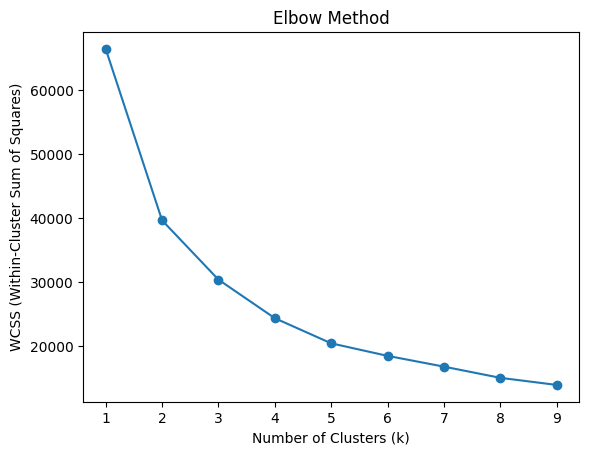

In [117]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [118]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

In [119]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6470583565462505


In [120]:
cluster_summary = df.groupby('Cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print(cluster_summary)

         NA_Sales  EU_Sales  JP_Sales  Other_Sales
Cluster                                           
0        0.300764  0.123573  0.794986     0.038084
1        0.896113  0.527091  0.045634     0.166128
2        4.009646  2.771063  1.080866     0.960197
3        0.102776  0.044556  0.027411     0.014709


In [121]:
# Hitung jumlah game per genre di tiap cluster
genre_by_cluster = df.groupby('Cluster')['Genre'].value_counts(normalize=True).unstack().fillna(0)

# Tampilkan genre dominan (contoh: ambil 3 teratas per cluster)
for cluster in genre_by_cluster.index:
    top_genres = genre_by_cluster.loc[cluster].sort_values(ascending=False).head(3)
    print(f"\nCluster {cluster} - Genre Dominan:")
    print(top_genres)


Cluster 0 - Genre Dominan:
Genre
Role-Playing    0.276657
Sports          0.113833
Action          0.109510
Name: 0, dtype: float64

Cluster 1 - Genre Dominan:
Genre
Action     0.227713
Sports     0.166072
Shooter    0.136526
Name: 1, dtype: float64

Cluster 2 - Genre Dominan:
Genre
Action     0.216535
Shooter    0.161417
Sports     0.118110
Name: 2, dtype: float64

Cluster 3 - Genre Dominan:
Genre
Action    0.200044
Sports    0.139622
Misc      0.107986
Name: 3, dtype: float64
